State Preparation

The notebook presents the state preparation approach using the classiq synthesis engine. Currently, for presenting our approach we will use an example system consisting of 4 masses.

The are connected by various springs. The first mass is connected to wall, followed by the second mass being connected to first, third mass to second and fourth mass to third

In [ ]:
#installation of classiq
!pip install -U classiq

We have a N=4 number of masses and so n = 2 (since N = 2^n).

The values of masses are as follows -
m1 = 1, m2 = 1, m3 = 1, m4 = 1

The values of spring constants are given by (Kij represents the spring constant of spring between masses i and j).

K11 = 1, K12 = 1, K21 = 1, K23 = 1,
K32 = 1, K34 = 1, K43 = 1


Additionally, the initial position is assumed as 0 for all the masses and the corresponding velocities are v1 = 1, v2 = -1, v3 = 0, v4 = 0

In [ ]:
import numpy as np

N = 4
n = np.log2(N)
m = 1

# mass matrix
M = np.diag(np.full(N,m))
print("Mass matrix")
print(M)

#position vector
x = np.zeros(N)
print("Position matrix")
print(x)

#velocity vector
x_dot = np.array([1,-1,0,0])
print("Velocity matrix")
print(x_dot)

#spring constant matrix
K = np.array(([1,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]))
print("Spring constant matrix")
print(K)

Mass matrix
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
Position matrix
[0. 0. 0. 0.]
Velocity matrix
[ 1 -1  0  0]
Spring constant matrix
[[1 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


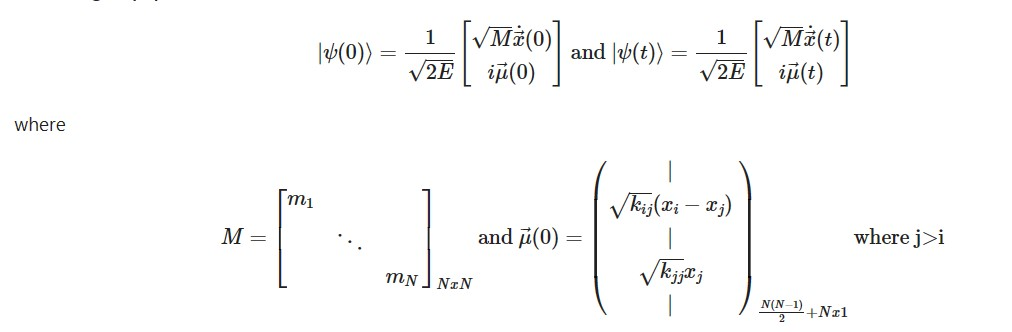

In [ ]:
from PIL import Image

img = Image.open('/content/Screenshot 2024-04-11 201546.jpg')
display(img)

In [ ]:
#y_dot vector
y_dot = np.matmul(np.transpose(x_dot),np.sqrt(M))
print("y_dot vector")
print(y_dot)

y_dot vector
[ 1. -1.  0.  0.]


In [ ]:
#mu vector
mu = []
for i in range(len(K)):
    for j in range(len(K[0])):
        if j>i:
            mu.append(np.sqrt(K[i][j])*(x[i]-x[j]))
        elif j==i:
            mu.append(np.sqrt(K[j][j])*x[j])
if len(mu)==(N*(N+1)/2):
    print("mu vector is formed correctly")
print("M = ",M)
print("x_dot = ",x_dot,"y_dot = ",y_dot, "mu = ", mu)

mu vector is formed correctly
M =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
x_dot =  [ 1 -1  0  0] y_dot =  [ 1. -1.  0.  0.] mu =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
#Initial State
psi0 = []
E = 1
psi0 = np.concatenate([y_dot,i*np.array(mu)])/np.sqrt(2*E)
print("psi0 = ",psi0, "size_of_psi0 = ",len(psi0))

psi0 =  [ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ] size_of_psi0 =  14


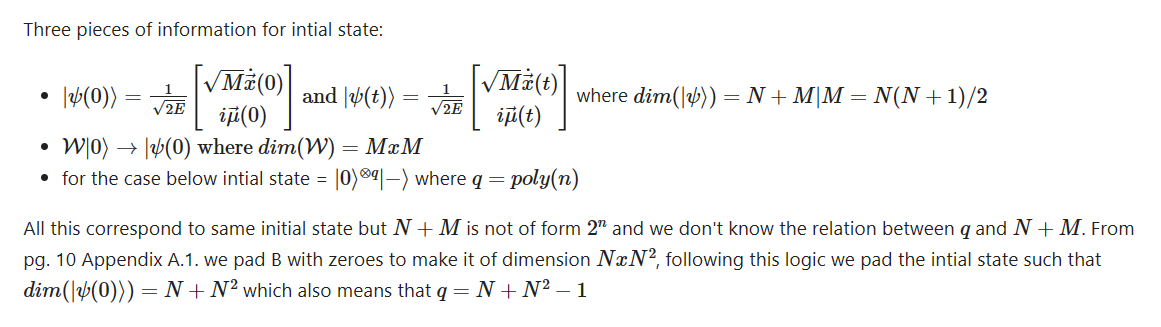

In [ ]:
img = Image.open('/content/Screenshot 2024-04-11 205033.png')
display(img)

In [ ]:
#making dimesion of q suitable with padding zeros
dim = int(N+(N*(N+1)/2))
while not(dim and (not(dim & (dim - 1)))): #checking of it is a power of 2
    dim+=1

num_qubits = int(np.log2(dim))
print(num_qubits)

4


In [ ]:
from classiq import (
    Output,
    QArray,
    QBit,
    control,
    create_model,
    execute,
    prepare_state,
    qfunc,
    show,
    synthesize,
)

In [ ]:
values_required = 2**num_qubits
for i in range(values_required - len(psi0)):
  psi0 = np.append(psi0,0.)

print(psi0)
print(len(psi0))

[ 0.70710678 -0.70710678  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
16


In [ ]:
print(type(psi0.tolist()))

<class 'list'>


In [ ]:
psi0**2

array([0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. ])

In [ ]:
@qfunc
def main(io: Output[QArray[QBit]]):
    prepare_state(probabilities=(psi0**2).tolist(), bound=0.01, out=io)


model = create_model(main)

In [ ]:
# Dumping the model
from classiq import write_qmod

write_qmod(model, "prepare_state")

Synthesizing the model to get the quantum circuit.

In [ ]:
# import classiq

# classiq.authenticate(overwrite=True)

In [ ]:
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/65713cbf-e188-48fc-97e7-68ef1f3a789e?version=0.39.0


In [ ]:
#Execution
from classiq.execution import (
    ClassiqBackendPreferences,
    ExecutionPreferences,
    set_quantum_program_execution_preferences,
)

preferences = ExecutionPreferences(
    backend_preferences=ClassiqBackendPreferences(backend_name="aer_simulator")
)
qprog = set_quantum_program_execution_preferences(qprog, preferences)

In [ ]:
job = execute(qprog)
results = job.result()

In [ ]:
print(results)

[TaggedExecutionDetails(value_type=<SavedResultValueType.ExecutionDetails: 'ExecutionDetails'>, name='result', value=ExecutionDetails(vendor_format_result={'backend_name': 'aer_simulator', 'backend_version': '0.11.2', 'date': '2024-04-12T04:22:03.521670', 'header': {'backend_name': 'aer_simulator', 'backend_version': '0.11.2'}, 'qobj_id': '04f5b903-fe24-4d10-82de-3e26d8013854', 'job_id': '0e6f8aa5-87dd-4c53-9547-331151dbcfde', 'status': 'COMPLETED', 'success': True, 'results': [{'shots': 2048, 'success': True, 'data': {'counts': {'0x0': 1067, '0x1': 981}}, 'meas_level': 2, 'header': {'clbit_labels': [['c0', 0], ['c0', 1], ['c0', 2], ['c0', 3]], 'creg_sizes': [['c0', 4]], 'global_phase': 0.0, 'memory_slots': 4, 'metadata': {}, 'n_qubits': 4, 'name': 'circuit_200', 'qreg_sizes': [['q', 4]], 'qubit_labels': [['q', 0], ['q', 1], ['q', 2], ['q', 3]]}, 'status': 'DONE', 'seed_simulator': 108898054, 'metadata': {'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 

In [ ]:
parsed_counts = results[0].value.parsed_counts
print(parsed_counts)

[{'io': 0.0}: 1067, {'io': 1.0}: 981]


In [ ]:
job.open_in_ide()

Hamiltonian formulation

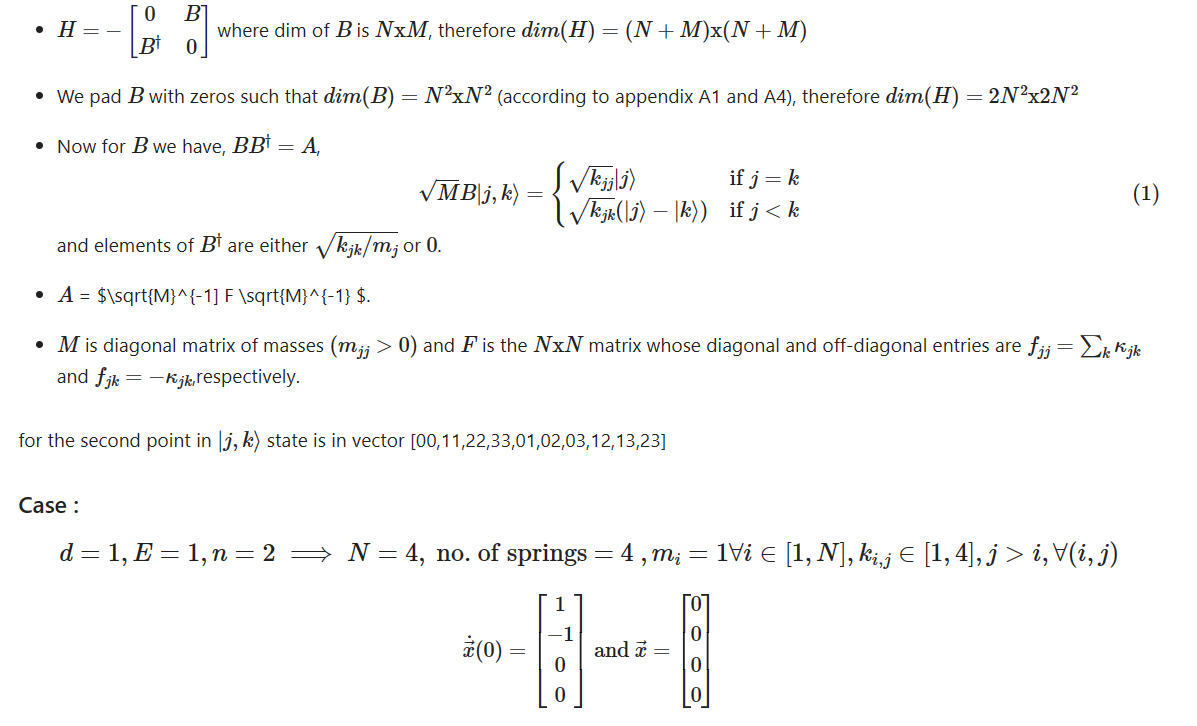

In [60]:
img = Image.open('/content/Screenshot 2024-04-11 234806.png')
display(img)

In [81]:
class Hamiltonian_Formulation:
    def __init__(self, n, K_matrix, M):
        self.N = 2**n
        self.K_matrix = K_matrix
        self.M = M

    def compute_F_matrix(self):
        N = self.N
        K = self.K_matrix
        # Matrix F
        F = np.zeros((N,N))
        for j in range(N):
            for k in range(N):
                if j==k:
                    F[j][k] = sum(K[j])
                else:
                    F[j][k] = -K[j][k]
        self.F_matrix = F

    def compute_B_matrix(self):
        N = self.N
        K = self.K_matrix
        sqM_B = np.zeros((N,int(N*(N+1)/2)))
        count = 0 #this will keep track of the coloumn of B based on |j,k>
        for j in range(N):
            for k in range(N):
                if j==k:
                    sqM_B[j][k] = np.sqrt(K[j][j])
                elif j<k:
                    sqM_B[j][N+count] = np.sqrt(K[j][k])
                    sqM_B[k][N+count] = -np.sqrt(K[j][k])
                    count+=1
        sqM_inv = np.linalg.inv(np.sqrt(M))
        #B matrix
        B = np.matmul(sqM_inv,sqM_B)
        #B dagger matrix
        B_dag = np.matrix(B).getH()
        self.B_matrix = B
        self.B_dag_matrix = B_dag

    def compute_Hamiltonian(self):
        #calling compute_B_matrix
        self.compute_B_matrix()
        ## doing the padding
        B = self.B_matrix
        B_dag = self.B_dag_matrix

        pad_B = np.pad(B,((0,int(N**2-N)),(0,int(N**2-(N*(N+1)/2)))),"constant")
        pad_B_dag = np.matrix(pad_B).getH()
        temp1 = np.concatenate((0*np.identity(N**2),-pad_B),axis = 1)
        temp2 = np.concatenate((-pad_B_dag, 0*np.identity(N**2)),axis = 1)
        # getting the hamiltonian
        H = np.concatenate((temp1,temp2),axis = 0)
        self.H_matrix = H

In [82]:
import copy
ham_formulation = Hamiltonian_Formulation(int(n), K, M)
ham_formulation.compute_Hamiltonian()
H_matrix = ham_formulation.H_matrix
print(H_matrix)
print(len(H_matrix))

[[ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]]
32


In [87]:
H_list = np.array(H_matrix.tolist())
print(H_list)

[[ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 [ 0.  0.  0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]
 [-0. -0. -0. ...  0.  0.  0.]]


Hamiltonian Evolution - Suzuki Trotterization

In [91]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.7 MB/s eta 0:00:00


In [99]:
from qiskit.quantum_info import SparsePauliOp
H = SparsePauliOp.from_operator(H_list)
print(H)

SparsePauliOp(['XIIII', 'XIIIZ', 'XIIZI', 'XIIZZ', 'XIXII', 'XIXIX', 'XIXIZ', 'XIXXI', 'XIXXZ', 'XIXZI', 'XIXZZ', 'XIYYI', 'XIYYZ', 'XIYZY', 'XIZII', 'XIZIZ', 'XIZZI', 'XIZZZ', 'XXIXI', 'XXIXX', 'XXIXZ', 'XXIYY', 'XXZXI', 'XXZXX', 'XXZXZ', 'XXZYY', 'XYIXY', 'XYIYI', 'XYIYX', 'XYIYZ', 'XYZXY', 'XYZYI', 'XYZYX', 'XYZYZ', 'XZIII', 'XZIIZ', 'XZIZI', 'XZIZZ', 'XZXII', 'XZXIX', 'XZXIZ', 'XZXXI', 'XZXXZ', 'XZXZI', 'XZXZZ', 'XZYYI', 'XZYYZ', 'XZYZY', 'XZZII', 'XZZIZ', 'XZZZI', 'XZZZZ', 'YIXYI', 'YIXYZ', 'YIXZY', 'YIYII', 'YIYIX', 'YIYIZ', 'YIYXI', 'YIYXZ', 'YIYZI', 'YIYZZ', 'YXIXY', 'YXIYI', 'YXIYX', 'YXIYZ', 'YXZXY', 'YXZYI', 'YXZYX', 'YXZYZ', 'YYIXI', 'YYIXX', 'YYIXZ', 'YYIYY', 'YYZXI', 'YYZXX', 'YYZXZ', 'YYZYY', 'YZXYI', 'YZXYZ', 'YZXZY', 'YZYII', 'YZYIX', 'YZYIZ', 'YZYXI', 'YZYXZ', 'YZYZI', 'YZYZZ'],
              coeffs=[-0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j, -0.0625+0.j,
  0.125 +0.j, -0.0625+0.j, -0.0625+0.j,  0.0625+0.j, -0.0625+0.j,
 -0.0625+0.j,  0.0625-0.j, -0.0625+0.j,

In [104]:
from classiq import (
    CustomHardwareSettings,
    Preferences,
    QArray,
    QuantumProgram,
    allocate,
    create_model,
    qfunc,
    set_preferences,
    show,
    suzuki_trotter,
    synthesize,
    write_qmod,
)


@qfunc
def main(io: Output[QArray[QBit]]) -> None:
    state = prepare_state(probabilities=(psi0**2).tolist(), bound=0.01, out=io)
    allocate(len(H_list[0]), state)
    suzuki_trotter(
        H_list.tolist(),
        evolution_coefficient=1,
        order=1,
        repetitions=1,
        qbv=state,
    )


qmod = create_model(main)
qmod = set_preferences(
    qmod,
    preferences=Preferences(
        custom_hardware_settings=CustomHardwareSettings(basis_gates=["cx", "u"])
    ),
)
write_qmod(qmod, "exponentiation")

qprog = synthesize(qmod)
circuit = QuantumProgram.from_qprog(qprog)

print(f"Classiq's exponentiation depth is {circuit.transpiled_circuit.depth}")
print(
    f"Classiq's exponentiation CX-count is {circuit.transpiled_circuit.count_ops['cx']}"
)
show(qprog)

ClassiqValueError: 'allocate' is missing required argument for 'out'
If you need further assistance, please reach out on our Community Slack channel at: https://short.classiq.io/join-slack
If the error persists feel free to open a ticket at: https://short.classiq.io/support